In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_1000.csv')

In [3]:
data=df[['correct_answ','bleu_score','levenstein_sim','cosine_sim','jaccard_sim']]

In [4]:
data.head(10)

,correct_answ,bleu_score,levenstein_sim,cosine_sim,jaccard_sim
0,0,0.000000,0.044444,0.170715,0.150000
1,1,0.263158,0.500000,0.673710,0.642857
2,1,1.000000,1.000000,1.000000,1.000000
3,1,1.000000,1.000000,1.000000,0.818182
4,1,0.263158,0.500000,0.673710,0.642857
5,1,0.333333,0.821429,1.000000,0.722222
6,1,1.000000,0.888889,0.771931,0.833333
7,1,0.263158,0.500000,0.673710,0.642857
8,1,0.322581,0.920000,0.435366,0.736842
9,1,1.000000,1.000000,1.000000,1.000000


In [5]:
data.describe()

,correct_answ,bleu_score,levenstein_sim,cosine_sim,jaccard_sim
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,0.791749,0.482141,0.595063,0.673648,0.619884
std,0.406257,0.421550,0.343143,0.326108,0.264925
min,0.000000,0.000000,0.000000,-0.168490,0.000000
25%,1.000000,0.108696,0.250000,0.450981,0.444444
50%,1.000000,0.263158,0.534856,0.714400,0.636364
75%,1.000000,1.000000,0.960000,1.000000,0.833333
max,1.000000,1.277778,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e755ef0>,
      dtype=object)

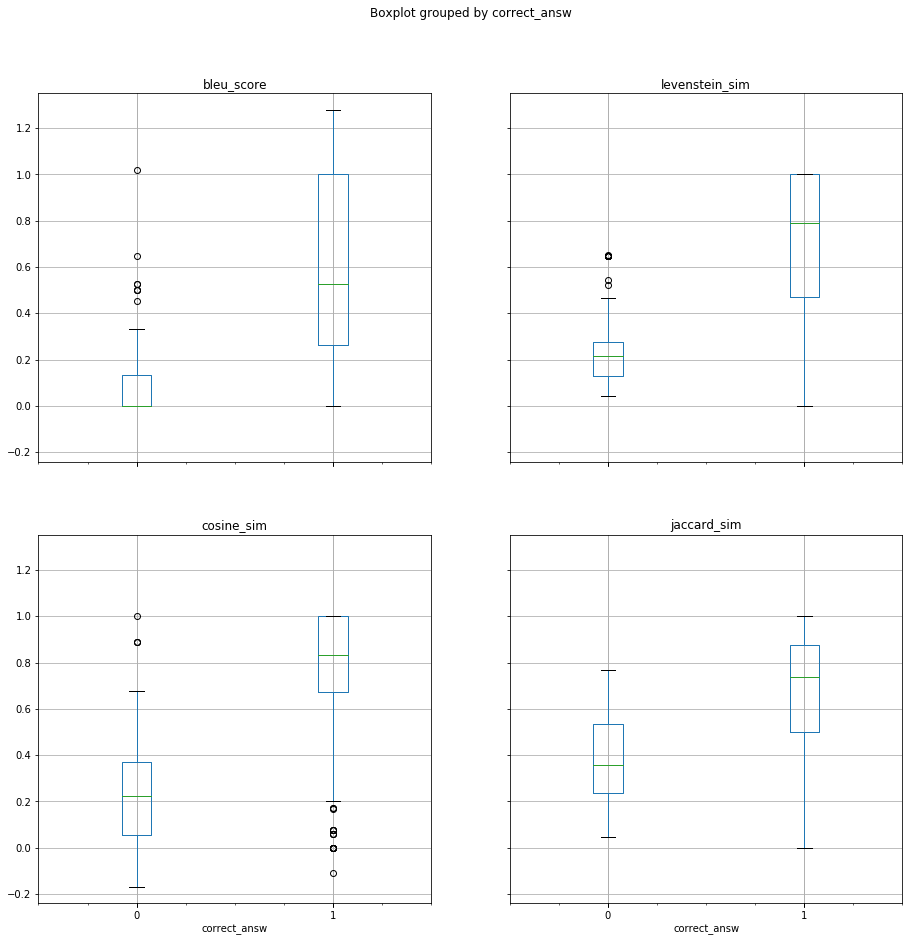

In [6]:
data.boxplot(by='correct_answ', column=['bleu_score', 'levenstein_sim', 'cosine_sim', 'jaccard_sim'], 
                       grid=True, figsize=(15,15))

In [8]:
X=data[['bleu_score','levenstein_sim','cosine_sim','jaccard_sim']]
y=data['correct_answ']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f4e83c8>,
      dtype=object)

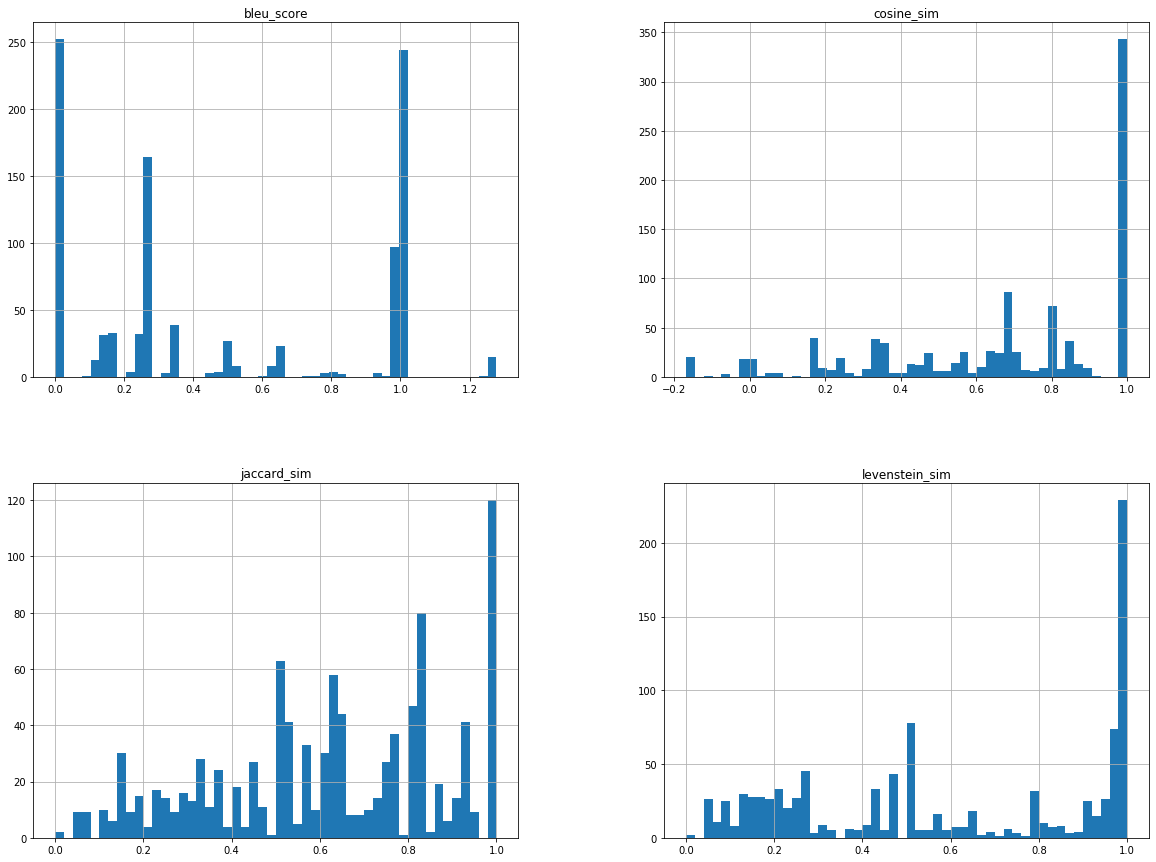

In [9]:
X.hist(bins=50,figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1215f7940>,
      dtype=object)

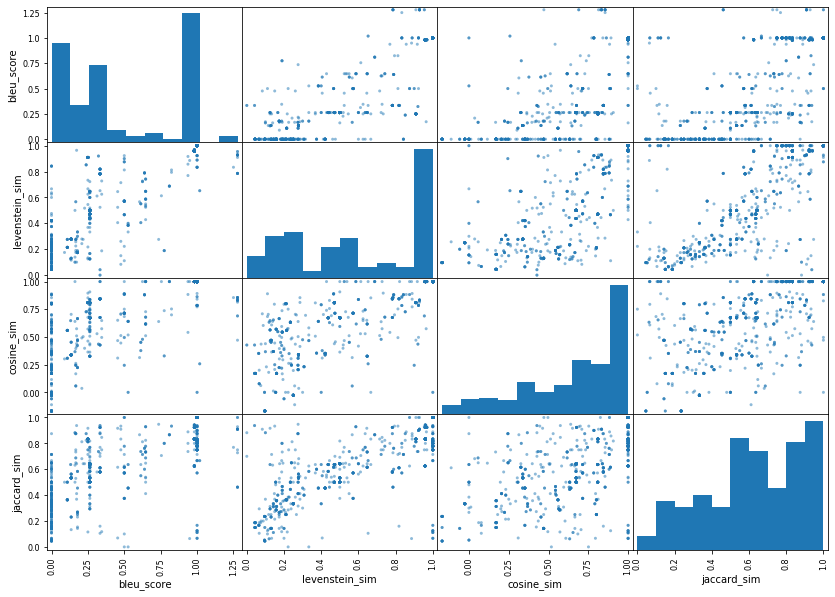

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, figsize=(14, 10))

In [11]:
corr_matrix = data.corr()
corr_matrix["correct_answ"].sort_values(ascending=False)

correct_answ      1.000000
cosine_sim        0.654558
levenstein_sim    0.540874
bleu_score        0.477642
jaccard_sim       0.455624
Name: correct_answ, dtype: float64

In [12]:
corr_matrix = data.corr()
corr_matrix["correct_answ"].sort_values(ascending=False)
corr_matrix    

,correct_answ,bleu_score,levenstein_sim,cosine_sim,jaccard_sim
correct_answ,1.000000,0.477642,0.540874,0.654558,0.455624
bleu_score,0.477642,1.000000,0.887539,0.767343,0.721674
levenstein_sim,0.540874,0.887539,1.000000,0.810308,0.787080
cosine_sim,0.654558,0.767343,0.810308,1.000000,0.646194
jaccard_sim,0.455624,0.721674,0.787080,0.646194,1.000000


In [56]:
X=data[['bleu_score','levenstein_sim','cosine_sim','jaccard_sim']]
x_col = X.columns
print(x_col)
y=data[['correct_answ']]

Index(['bleu_score', 'levenstein_sim', 'cosine_sim', 'jaccard_sim'], dtype='object')


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["correct_answ"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [15]:
print(data["correct_answ"].value_counts() / len(data))
print('------------')
print(strat_train_set["correct_answ"].value_counts() / len(strat_train_set))
print('------------')
print(strat_test_set["correct_answ"].value_counts() / len(strat_test_set))

1    0.791749
0    0.208251
Name: correct_answ, dtype: float64
------------
1    0.791155
0    0.208845
Name: correct_answ, dtype: float64
------------
1    0.794118
0    0.205882
Name: correct_answ, dtype: float64


In [196]:
training = strat_train_set.copy()
testing=strat_test_set.copy()

In [197]:
X_training=training[['bleu_score','levenstein_sim','cosine_sim','jaccard_sim']]
y_training=training[['correct_answ']]
X_testing=testing[['bleu_score','levenstein_sim','cosine_sim','jaccard_sim']]
y_testing=testing[['correct_answ']]

In [198]:
#create combination of hyperparameter
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 20, num = 10)] # of trees in the forest
max_features = ['auto', 'sqrt','log2'] #number of features to consider when looking for the best split
max_depth = [1,2,3]  # maximum depth of the tree
max_depth.append(None)
min_samples_split = [1, 5] # min number of samples required to split an internal node
min_samples_leaf = [1, 2, 4] #min number of samples in a leaf node
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18, 20], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 2, 3, None], 'min_samples_split': [1, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [199]:
#training model using combination of different hyperparameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.base import clone
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_training, y_training):
    X_train_folds = X_training.iloc[train_index]
    y_train_folds = y_training.iloc[train_index]
    X_test_fold = X_training.iloc[test_index]
    y_test_fold = y_training.iloc[test_index]
    rf = RandomForestClassifier()
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    rf_random.fit(X_train_folds, y_train_folds)



/Users/chloekim12/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.4s finished
/Users/chloekim12/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.7s finished
/Users/chloekim12/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.3s finished
/Users/chloekim12/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [200]:
#show best hyperparameter
print(rf_random.best_params_)

{'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [201]:
# model using default hyperparameter for evaluating training data
base_model = RandomForestClassifier(n_estimators=10, random_state = 42)
base_model.fit(X_training, y_training)
base_model_prediction=base_model.predict(X_training)
print('accuracy:',accuracy_score(y_training,base_model_prediction))
print('f1:',f1_score(y_training,base_model_prediction))
print('precision:',precision_score(y_training,base_model_prediction))
print('recall:',recall_score(y_training,base_model_prediction))

accuracy: 0.9864864864864865
f1: 0.9914129586260734
precision: 0.9968602825745683
recall: 0.9860248447204969


/Users/chloekim12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
#model using optimized hyperparameter to evaluate training data
best_random = rf_random.best_estimator_
best_random.fit(X_training, y_training)
best_random_prediction=best_random.predict(X_training)
print('accuracy:',accuracy_score(y_training,best_random_prediction))
print('f1:',f1_score(y_training,best_random_prediction))
print('precision:',precision_score(y_training,best_random_prediction))
print('recall:',recall_score(y_training,best_random_prediction))


accuracy: 0.9864864864864865
f1: 0.991466252909232
precision: 0.9906976744186047
recall: 0.9922360248447205


/Users/chloekim12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [203]:
#visualize random forest

from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf_random.best_estimator_[3]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', 
                feature_names = ['bleu_score','levenstein_sim','cosine_sim','jaccard_sim'], 
                rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')



In [204]:
#visualize one decision tree

from sklearn.ensemble import RandomForestRegressor
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_training, y_training)
# Extract the small tree
tree_small = rf_small.estimators_[3]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = ['bleu_score','levenstein_sim','cosine_sim','jaccard_sim'], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

/Users/chloekim12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [207]:
# Get numerical feature importances
importances = list(rf_small.feature_importances_)

# List of tuples with variable and importance
feature_names = ['bleu_score','levenstein_sim','cosine_sim','jaccard_sim']
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cosine_sim           Importance: 0.73
Variable: levenstein_sim       Importance: 0.17
Variable: jaccard_sim          Importance: 0.08
Variable: bleu_score           Importance: 0.01


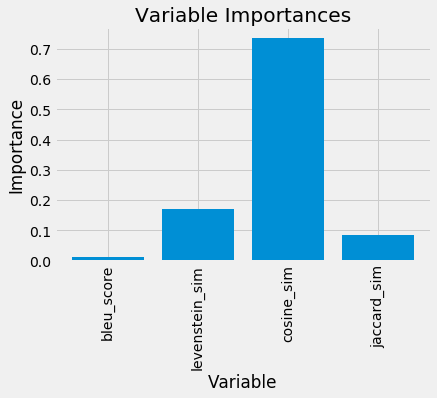

In [208]:
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_names, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [209]:
# quantify the improvement on training data
print('accuracy_improvement:',accuracy_score(y_training,best_random_prediction)-accuracy_score(y_training,base_model_prediction))
print('f1_improvement:',f1_score(y_training,best_random_prediction)-accuracy_score(y_training,base_model_prediction))
print('precision_improvement',precision_score(y_training,best_random_prediction)-accuracy_score(y_training,base_model_prediction))
print('recall_improvement',recall_score(y_training,best_random_prediction)-accuracy_score(y_training,base_model_prediction))


accuracy_improvement: 0.0
f1_improvement: 0.004979766422745446
precision_improvement 0.0042111879321181656
recall_improvement 0.0057495383582339965


In [210]:
# model using default hyperparameter to evaluate testing data
base_model_prediction=base_model.predict(X_testing)
print('accuracy:',accuracy_score(y_testing,base_model_prediction))
print('f1:',f1_score(y_testing,base_model_prediction))
print('precision:',precision_score(y_testing,base_model_prediction))
print('recall:',recall_score(y_testing,base_model_prediction))

accuracy: 0.9362745098039216
f1: 0.9587301587301588
precision: 0.9869281045751634
recall: 0.9320987654320988


In [211]:
# model using optimized hyperparameter to evaluate testing data
best_random_prediction=best_random.predict(X_testing)
print('accuracy:',accuracy_score(y_testing,best_random_prediction))
print('f1:',f1_score(y_testing,best_random_prediction))
print('precision:',precision_score(y_testing,best_random_prediction))
print('recall:',recall_score(y_testing,best_random_prediction))

accuracy: 0.9558823529411765
f1: 0.9717868338557994
precision: 0.9872611464968153
recall: 0.9567901234567902


In [212]:
# quantify the improvement on testing data
print('accuracy_improvement:',accuracy_score(y_testing,best_random_prediction)-accuracy_score(y_testing,base_model_prediction))
print('f1_improvement:',f1_score(y_testing,best_random_prediction)-accuracy_score(y_testing,base_model_prediction))
print('precision_improvement',precision_score(y_testing,best_random_prediction)-accuracy_score(y_testing,base_model_prediction))
print('recall_improvement',recall_score(y_testing,best_random_prediction)-accuracy_score(y_testing,base_model_prediction))





accuracy_improvement: 0.019607843137254943
f1_improvement: 0.035512324051877875
precision_improvement 0.050986636692893716
recall_improvement 0.02051561365286858


/Users/chloekim12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Text(0, 0.5, 'cosine_sim')

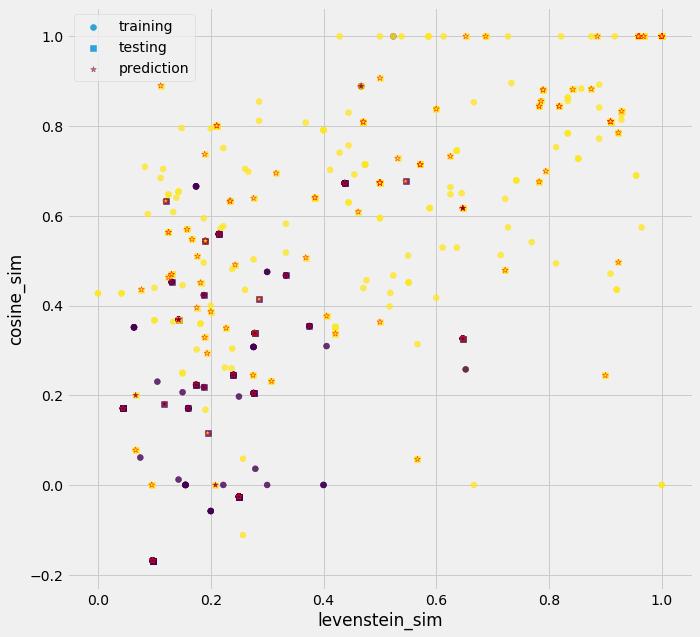

In [213]:
X_training=training[['levenstein_sim','cosine_sim']]
y_training=training[['correct_answ']]
X_testing=testing[['levenstein_sim','cosine_sim']]
y_testing=testing[['correct_answ']]

base_model = RandomForestClassifier(n_estimators=10, random_state = 42)
base_model.fit(X_training, y_training)
base_model_prediction=base_model.predict(X_testing)


fig=plt.figure(figsize=(10,10))
plt.scatter(x=X_training['levenstein_sim'],y=X_training['cosine_sim'],c=training['correct_answ'],cmap='viridis',alpha=0.8,label='training')
plt.scatter(x=X_testing['levenstein_sim'],y=X_testing['cosine_sim'],marker='s',c=testing['correct_answ'],cmap='viridis',alpha=0.8,label='testing')
plt.scatter(x=X_testing['levenstein_sim'],y=X_testing['cosine_sim'],marker='*',c=base_model_prediction,cmap='viridis',alpha=0.8,label='prediction',edgecolors='red')
plt.legend()
plt.xlabel("levenstein_sim")
plt.ylabel("cosine_sim")